In [35]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings; warnings.filterwarnings('ignore');

In [2]:
from pydataset import data

# 1. PMF

In [6]:
l = []
for i in range(10000):
    l.append(random.randint(1,6))

In [ ]:
print(l)

In [ ]:
# analysing values with counts
random_variable = pd.Series(l).value_counts().sort_index()
random_variable

1    1682
2    1681
3    1624
4    1692
5    1638
6    1683
Name: count, dtype: int64

In [ ]:
probabilities = random_variable / 10000
probabilities

1    0.1682
2    0.1681
3    0.1624
4    0.1692
5    0.1638
6    0.1683
Name: count, dtype: float64

<Axes: title={'center': 'PMF Distribution Plot of Die roll'}, xlabel='Dice events', ylabel='probability of dice events'>

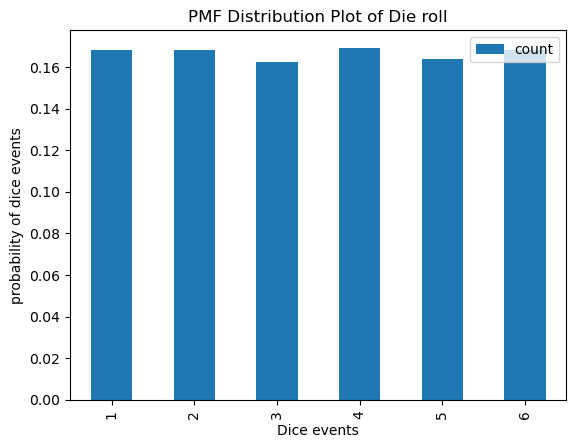

In [ ]:
pd.DataFrame(probabilities).plot(kind='bar', title = 'PMF Distribution Plot of Die roll', xlabel = 'Dice events', ylabel = 'probability of dice events')

### Now taking PMF for the sum of two dice

In [ ]:
l2 = []
for i in range(10000):
   #dice 1
    a = random.randint(1,6)
   # dice 2
    b = random.randint(1,6)
    l2.append(a+b)

In [ ]:
print(l2)

In [ ]:
# analysing values with counts
random_variable2 = pd.Series(l2).value_counts().sort_index()
random_variable2

2      293
3      584
4      825
5     1159
6     1359
7     1632
8     1366
9     1117
10     818
11     548
12     299
Name: count, dtype: int64

In [ ]:
probabilities2 = random_variable2 / 10000
probabilities2

2     0.0293
3     0.0584
4     0.0825
5     0.1159
6     0.1359
7     0.1632
8     0.1366
9     0.1117
10    0.0818
11    0.0548
12    0.0299
Name: count, dtype: float64

<Axes: title={'center': 'PMF Distribution Plot of Sum of two dice roll'}, xlabel='outcomes', ylabel='Probabilities of outcome'>

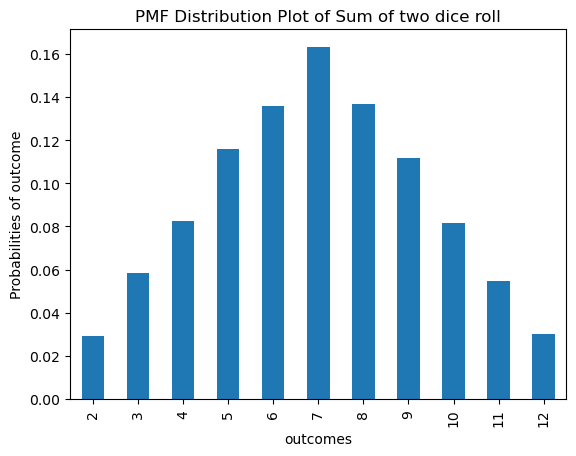

In [ ]:
pd.Series(probabilities2).plot(kind = 'bar', title = 'PMF Distribution Plot of Sum of two dice roll', xlabel = 'outcomes', ylabel = 'Probabilities of outcome')

# 2. CDF

In [ ]:
# again taking a dice throw experiment
probabilities

1    0.1682
2    0.1681
3    0.1624
4    0.1692
5    0.1638
6    0.1683
Name: count, dtype: float64

In [ ]:
np.cumsum(probabilities)

1    0.1682
2    0.3363
3    0.4987
4    0.6679
5    0.8317
6    1.0000
Name: count, dtype: float64

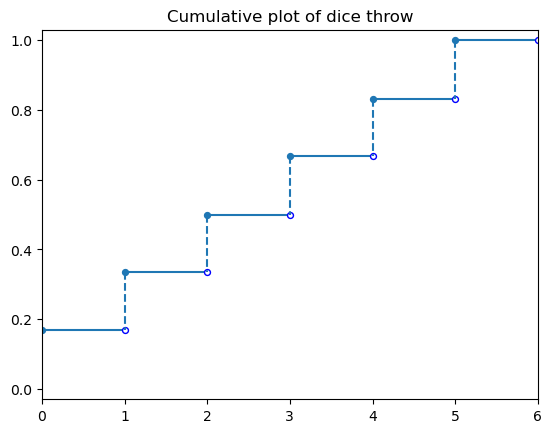

In [ ]:
x = (probabilities.index).insert(0,0)
y = np.cumsum(probabilities)
plt.hlines(y=y, xmax=x[:-1], xmin=x[1:], zorder=1)
plt.vlines(x=x[1:-1], ymax=y[:-1], ymin=y[1:], linestyles='--')
plt.scatter(x[1:], np.array(y), s=18, edgecolors='blue', color='white')
plt.scatter(x[:-1], np.array(y), s=18)
plt.xlim(x[0], x[-1])
plt.ylim(-0.03,1.03)
plt.title('Cumulative plot of dice throw')
plt.show()

<Axes: title={'center': 'Cumulative Distribution Plot of Die roll'}, xlabel='Dice events', ylabel='probability of dice events'>

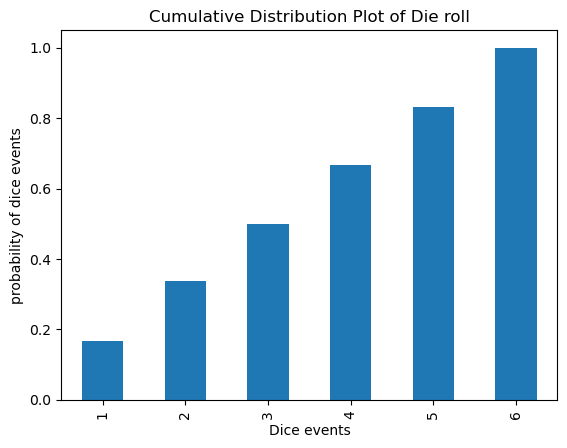

In [ ]:
np.cumsum(probabilities).plot(kind='bar', title = 'Cumulative Distribution Plot of Die roll', xlabel = 'Dice events', ylabel = 'probability of dice events')

In [ ]:
# sum of two dice thrown
probabilities2

2     0.0293
3     0.0584
4     0.0825
5     0.1159
6     0.1359
7     0.1632
8     0.1366
9     0.1117
10    0.0818
11    0.0548
12    0.0299
Name: count, dtype: float64

<Axes: title={'center': 'Cumulative Plot of Sum of two dice roll'}, xlabel='outcomes', ylabel='Probabilities of outcome'>

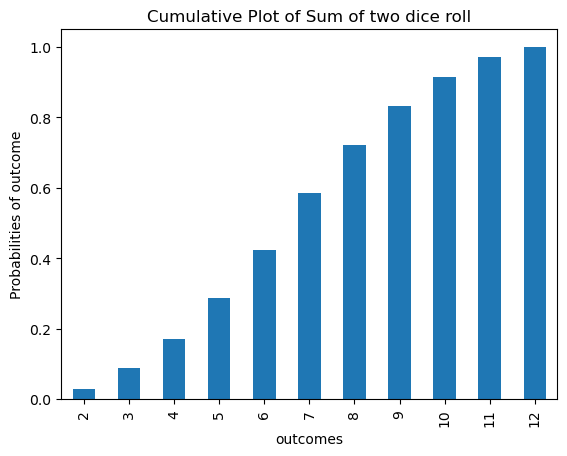

In [ ]:
np.cumsum(probabilities2).plot(kind='bar', title = 'Cumulative Plot of Sum of two dice roll', xlabel = 'outcomes', ylabel = 'Probabilities of outcome')

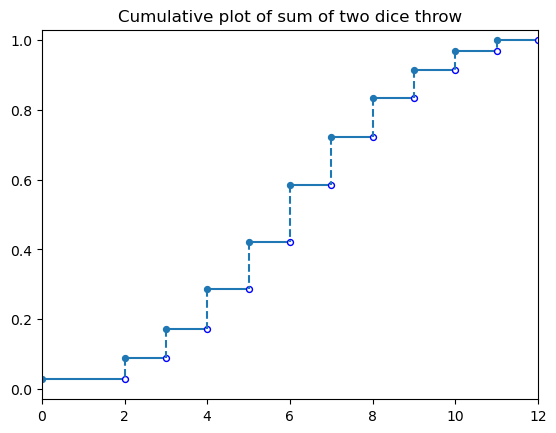

In [ ]:
x = (probabilities2.index).insert(0,0)
y = np.cumsum(probabilities2)
plt.hlines(y=y, xmax=x[:-1], xmin=x[1:], zorder=1)
plt.vlines(x=x[1:-1], ymax=y[:-1], ymin=y[1:], linestyles='--')
plt.scatter(x[1:], np.array(y), s=18, edgecolors='blue', color='white')
plt.scatter(x[:-1], np.array(y), s=18)
plt.xlim(x[0], x[-1])
plt.ylim(-0.03,1.03)
plt.title('Cumulative plot of sum of two dice throw')
plt.show()

In [ ]:
iris = data('iris')

In [ ]:
iris.head(7)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


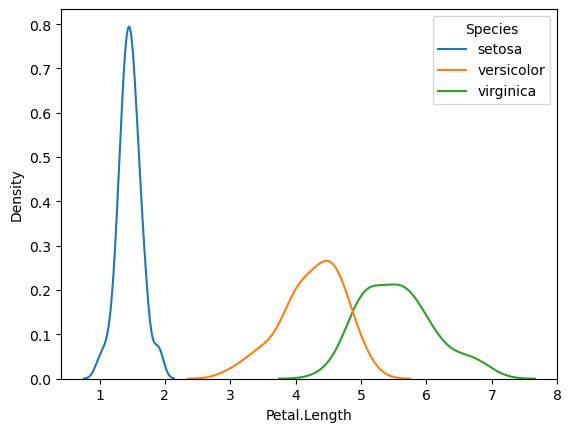

In [ ]:
# Drawing pdfs
sns.kdeplot(data=iris, x='Petal.Length', hue='Species'); plt.show()

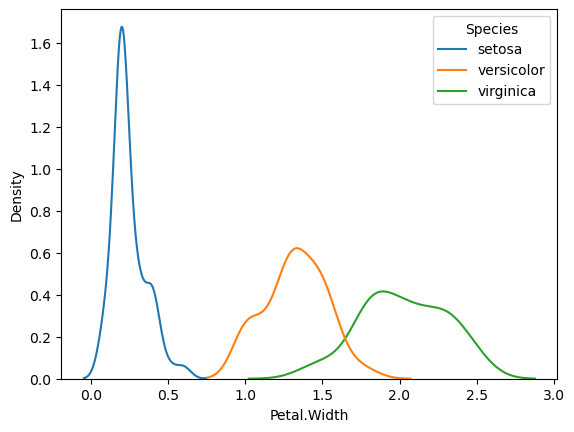

In [ ]:
sns.kdeplot(data=iris, x='Petal.Width', hue='Species'); plt.show()

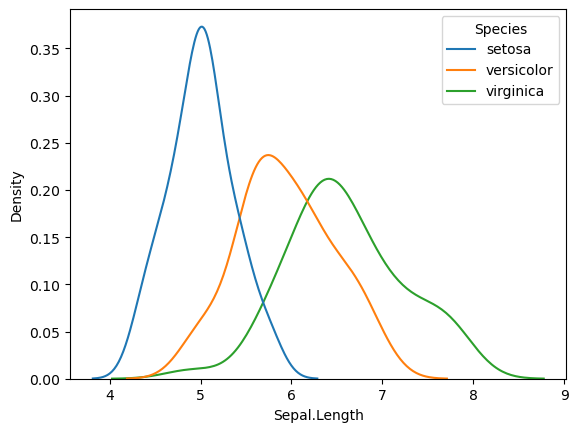

In [ ]:
sns.kdeplot(data=iris, x='Sepal.Length', hue='Species'); plt.show()

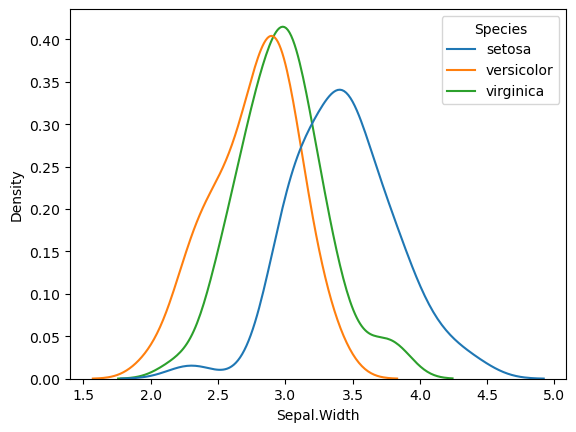

In [ ]:
sns.kdeplot(data=iris, x='Sepal.Width', hue='Species'); plt.show()

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


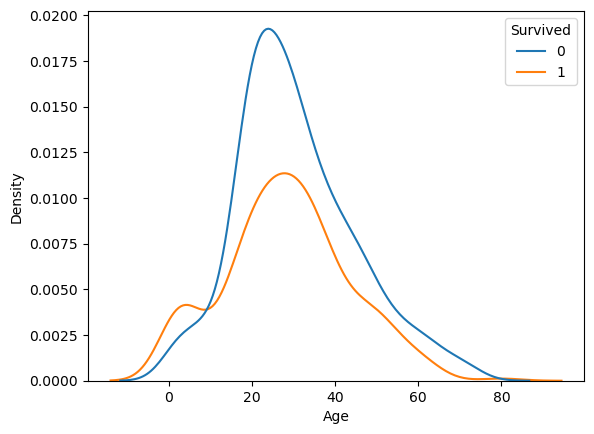

In [ ]:
sns.kdeplot(data=titanic, x='Age', hue='Survived'); plt.show()

* In continous PDF, it shows the probability density at any point, P(X = $x$).
* In continous CDF, it shows the probability from left (or beginning) upto that point,

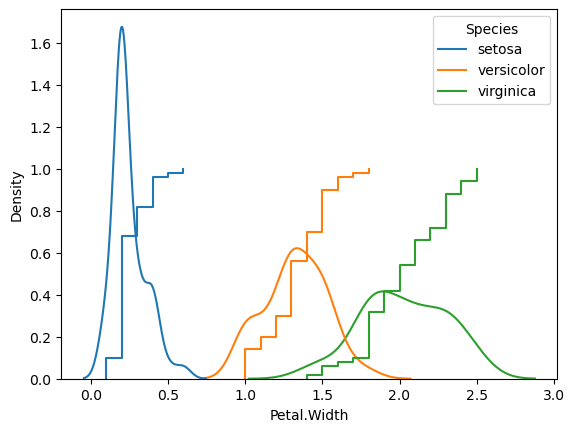

In [ ]:
# CDF and PDF
sns.kdeplot(data=iris, x='Petal.Width', hue='Species');
sns.ecdfplot(data=iris, x='Petal.Width', hue='Species'); plt.show()

CDf are quantitative labels that how much wrong or right i am of decisions we made using PDfs. or say verification.

https://samp-suman-normal-dist-visualize-app-lkntug.streamlit.app/

# 3. Standard Normal Distribution

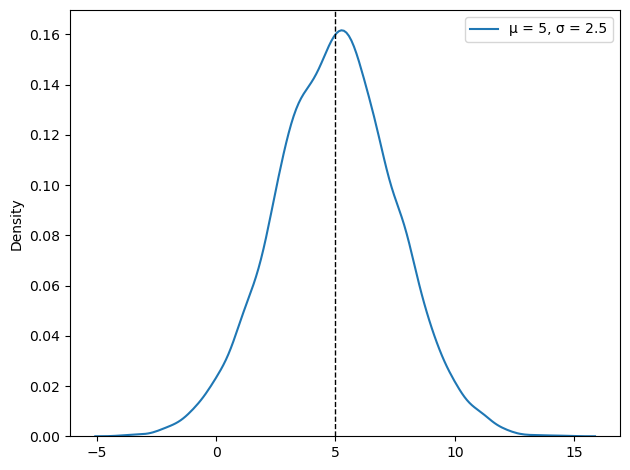

In [ ]:
mean = 5
std_dev = 2.5

x = np.random.normal(mean, std_dev, 10000)
sns.kdeplot(x, label = 'μ = 5, σ = 2.5'); 
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend(); plt.tight_layout();
plt.show();

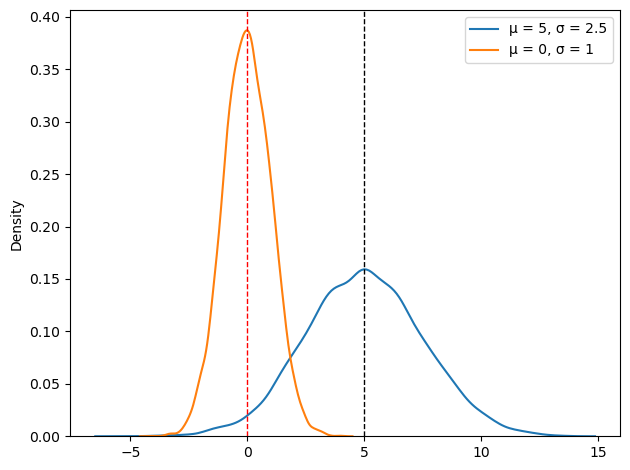

In [ ]:
mean = 5
std_dev = 2.5

x = np.random.normal(mean, std_dev, 10000)
y = np.random.normal(0, 1, 10000)
sns.kdeplot(x, label = 'μ = 5, σ = 2.5'); 
sns.kdeplot(y, label = 'μ = 0, σ = 1'); 
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend(); plt.tight_layout();
plt.show();

In [ ]:
# standardize the data
z = (x - mean)/std_dev

In [ ]:
z.mean()

-0.011320286039553644

In [ ]:
z.std()

1.008074308335098

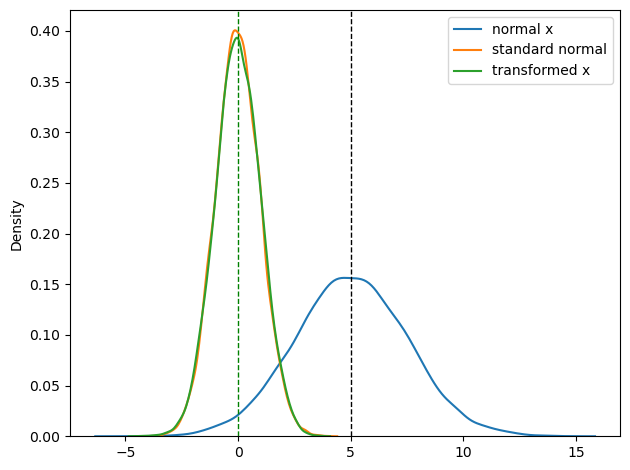

In [ ]:
x = np.random.normal(mean, std_dev, 10000)
y = np.random.normal(0, 1, 10000)
sns.kdeplot(x, label = 'normal x'); sns.kdeplot(y, label = 'standard normal'); sns.kdeplot(z, label = 'transformed x'); 
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(z.mean(), color='g', linestyle='dashed', linewidth=1)
plt.legend(); plt.tight_layout();
plt.show();

In [ ]:
import scipy.stats as st

In [ ]:
st.norm.cdf(20/15)

0.9087887802741321

# 4. Central Limit Theorem

In [ ]:
### Dice roll (CLT)
alist = []
means = []
n = 40 # Sample Size
num_samples = 10000 # Number of Samples
for j in range(num_samples): # Drawing 10,000 Samples
    alist2 = []
    for i in range(n): # Rolling a die n times i.e., Sample Size
        roll = np.random.randint(1,7)
        alist2.append(roll)
    means.append(np.mean(alist2))
    alist.append(alist2)
alist = np.array(alist)


In [ ]:
pd.Series(means).sample(8)

2904    3.800
8669    3.700
5216    3.625
7072    3.750
4472    3.425
328     3.525
3189    2.925
9536    3.275
dtype: float64

In [ ]:
print("Sample Means size = ", len(means))

Sample Means size =  10000


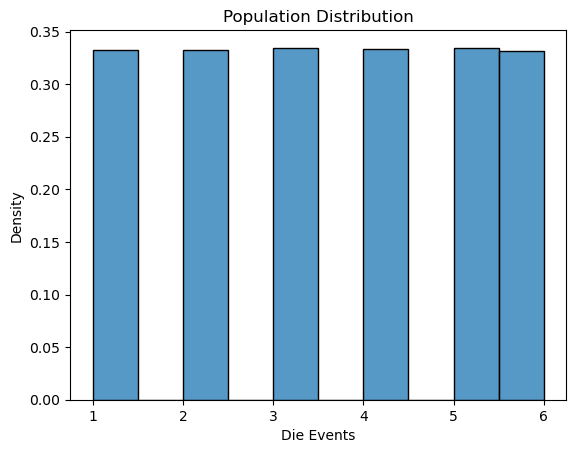

In [ ]:
sns.histplot(alist.flatten(), bins=10, stat='density')
plt.title("Population Distribution")
plt.xlabel("Die Events")
plt.show()

In [ ]:
# Population Parameters
print("Population mean, μ = ", np.mean((1,2,3,4,5,6)))
print("Population Standard deviation, σ = ", np.std((1,2,3,4,5,6)))
print("σ / √n = ", np.std((1,2,3,4,5,6))/np.sqrt(40))

Population mean, μ =  3.5
Population Standard deviation, σ =  1.707825127659933
σ / √n =  0.2700308624336608


In [ ]:
print("mean of sample means, x̄ = ", np.round(np.mean(means), 3))

mean of sample means, x̄ =  3.5


In [ ]:
print("Standard deviation of sample means, s = ", np.round(np.std(means), 3))

Standard deviation of sample means, s =  0.267


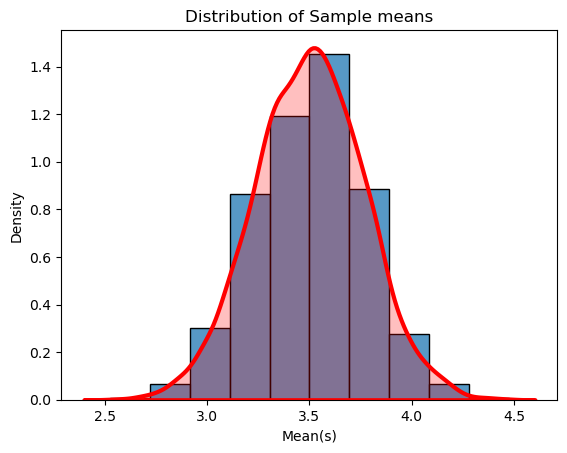

In [ ]:
sns.histplot(means, bins=10, stat='density')
sns.kdeplot(means, color='red', linewidth=3, fill=True); plt.title("Distribution of Sample means")
plt.xlabel("Mean(s)")
plt.show()

In [ ]:
# Calculating confidence interval
sample_mean = np.mean(means)
sample_std = np.std(means)
# for 95% confidence using empirical rule
print("95% confidence interval = ", (np.round(sample_mean - 2*sample_std, 3), np.round(sample_mean + 2*sample_std, 2)))

95% confidence interval =  (2.966, 4.03)


In [ ]:
print("68% confidence interval = ", (np.round(sample_mean - sample_std, 3), np.round(sample_mean + sample_std, 2)))
print("99% confidence interval = ", (np.round(sample_mean - 3*sample_std, 3), np.round(sample_mean + 3*sample_std, 2)))

68% confidence interval =  (3.233, 3.77)
99% confidence interval =  (2.7, 4.3)


In [16]:
petal_length = iris['Petal.Width']

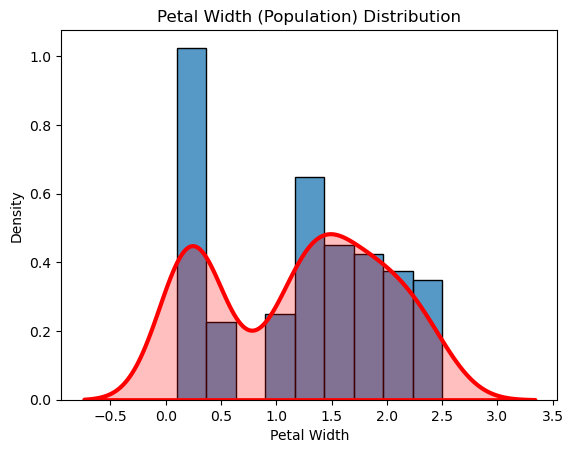

In [ ]:
sns.histplot(petal_length, stat='density')
sns.kdeplot(petal_length, color='red', linewidth=3, fill=True)
plt.title("Petal Width (Population) Distribution")
plt.xlabel("Petal Width")
plt.show()

In [ ]:
df = pd.Series(petal_length)

In [ ]:
# Population Parameters
n = 40 # sample size
print("Population mean, μ = ", np.mean(petal_length))
print("Population Standard deviation, σ = ", np.std(petal_length))
print("σ / √n = ", np.std(petal_length)/np.sqrt(n))

Population mean, μ =  1.1993333333333336
Population Standard deviation, σ =  0.7596926279021594
σ / √n =  0.12011795129048039


In [ ]:
# drawing samples
num_samples2 = 1000
means2 = []
for i in range(num_samples2):
    temp = df.sample(n).mean()  # taking mean of 40 samples from population
    means2.append(np.mean(temp))

In [ ]:
print("mean of sample means, x̄ = ", np.round(np.mean(means2), 3))
print("Standard deviation of sample means, s = ", np.round(np.std(means2), 3))

mean of sample means, x̄ =  1.195
Standard deviation of sample means, s =  0.105


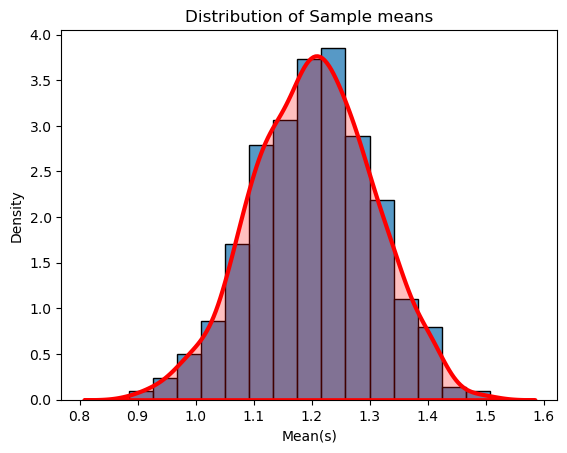

In [ ]:
sns.histplot(means2, bins = 15, stat='density')
sns.kdeplot(means2, color='red', linewidth=3, fill=True)
plt.title("Distribution of Sample means")
plt.xlabel("Mean(s)")
plt.show()

In [ ]:
# Confidence Interval
sample_mean2 = np.mean(means2)
sample_std2 = np.std(sample_means2)
# for 95% confidence using empirical rule
# Calculating confidence interval
print("95% confidence interval = ", (np.round(sample_mean2 - 2*sample_std2, 3), np.round(sample_mean2 + 2*sample_std2, 2)))

95% confidence interval =  (0.985, 1.41)


In [ ]:
print("68% confidence interval = ", (np.round(sample_mean2 - sample_std2, 3), np.round(sample_mean2 + sample_std2, 2)))
print("99% confidence interval = ", (np.round(sample_mean2 - 3*sample_std2, 3), np.round(sample_mean2 + 3*sample_std2, 2)))

68% confidence interval =  (1.09, 1.3)
99% confidence interval =  (0.88, 1.51)


### Step-by-step process:<br>

Collect multiple random samples of salaries from a representative group
of Indians. Each sample should be large enough (usually, n > 30) to ensure
the CLT holds. Make sure the samples are representative and unbiased to
avoid skewed results.

1. Calculate the sample mean (average salary) and sample standard
deviation for each sample.
2. Calculate the average of the sample means. This value will be your best
estimate of the population mean (average salary of all Indians).
3. Calculate the std deviation.
4. Calculate the confidence interval around the average of the sample means
to get a range within which the true population mean likely falls. For a
95% confidence interval:
5. (i)lower_limit = average_sample_means - 2 * std 
    
    (ii)upper_limit = average_sample_means + 2 * std
6. Report the estimated average salary and the confidence interval.


Remember that the validity of your results depends on the quality of your
data and the representativeness of your samples. To obtain accurate
results, it's crucial to ensure that your samples are unbiased and
representative.

Step-by-step process:
Collect multiple random samples of salaries from a representative group
of Indians. Each sample should be large enough (usually, n > 30) to ensure
the CLT holds. Make sure the samples are representative and unbiased to
avoid skewed results.
1.

Calculate the sample mean (average salary) and sample standard
deviation for each sample.
2.

Calculate the average of the sample means. This value will be your best
estimate of the population mean (average salary of all Indians).
3.

Calculate the standard error of the sample means, which is the standard
deviation of the sample means divided by the square root of the number
of samples.
4.

Calculate the confidence interval around the average of the sample means
to get a range within which the true population mean likely falls. For a
95% confidence interval:
5.

lower_limit = average_sample_means - 1.96 * standard_error
upper_limit = average_sample_means + 1.96 * standard_error
6. Report the estimated average salary and the confidence interval.

Python code

Remember that the validity of your results depends on the quality of your
data and the representativeness of your samples. To obtain accurate
results, it's crucial to ensure that your samples are unbiased and
representative.

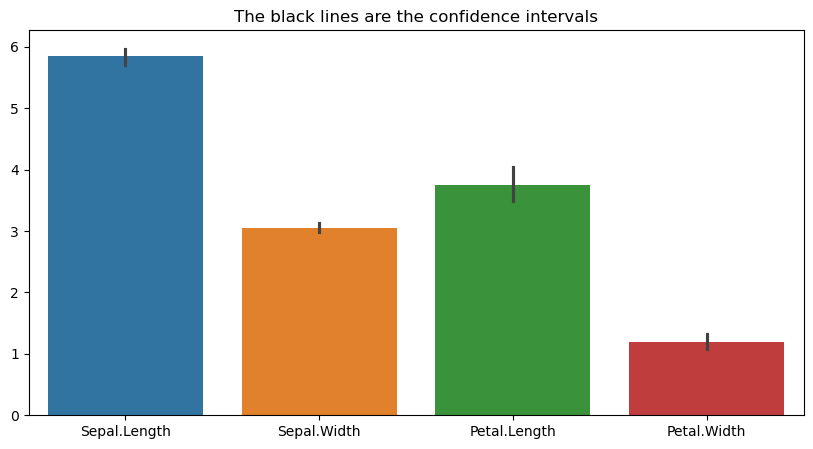

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(iris)
plt.title("The black lines are the confidence intervals")
plt.show()

# Confidence interval

when $\sigma$ known, 
$$ \text{Confidence Interval} = \text{Point estimate } \pm \text{ } z_{{\alpha}/{2}} \times \frac{\sigma}{\sqrt{n}} $$
where, <br>
> $z_{{\alpha}/{2}}$ = critical value <br>
> $\sigma$ = Population standard deviation <br>
> $n$ = sample size


In [3]:

def confidence_plot(indexs, values,std, z=1.96, color='#2187bb'):
    values = np.array(values)
    means = np.mean(values)
    moe = z * std / np.sqrt(values.size)

    left = indexs-0.25
    right = indexs+0.25
    top = means + moe
    bottom = means - moe
    plt.plot([indexs,indexs], [top,bottom], color=color, label="Interval range")
    plt.plot([left, right],[top, top], color='red', label = "Upper limit")
    plt.plot([left, right],[bottom, bottom], color='magenta', label = "Lower limit")
    plt.plot(indexs, means, 'o', color='green', label = "Sample mean")
    return means, moe


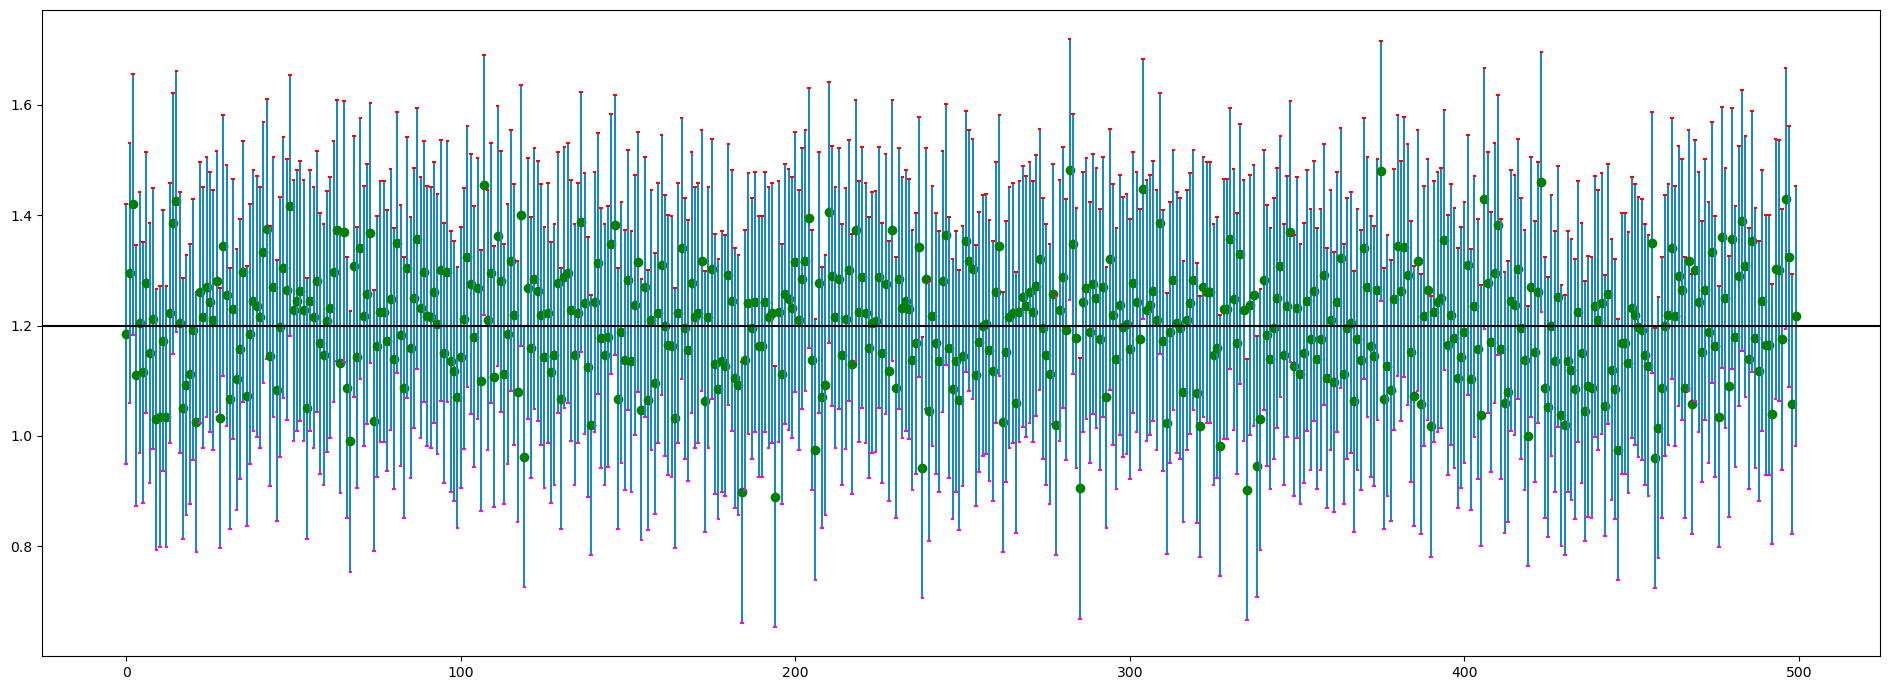

The population parameter lies within range  487  times out of  500  or 97.39999999999999%


In [34]:
iris = data('iris')
petal_width = iris['Petal.Width']
df = pd.Series(petal_width)
num_samples2 = 500
alist3 = []; means2 = [];
for i in range(num_samples2):
    temp = df.sample(40)
    alist3.append(temp.tolist())
      # taking mean of 40 samples from population
plt.figure(figsize=(19,7))
for i, j in enumerate(alist3): 
    confidence_plot(i, j, std = petal_width.std()) # using standard deviation of population
plt.axhline(y = df.mean(), color='black'); 
plt.tight_layout(); plt.show();

lower_limits2 = []
upper_limits2 = []
means_list2 = []
for i, j in enumerate(alist3):
    values = np.array(j); 
    means = np.mean(values)
    means_list2.append(means)
    std = 0.7622
    moe = 1.96 * std / np.sqrt(values.size)
    lower_limits2.append(means-moe)
    upper_limits2.append(means+moe)

limit_check2 = []
for i in range(len(means_list2)):
    if (df.mean() >= lower_limits2[i])  & (df.mean() <= upper_limits2[i]):
        limit_check2.append(1)

print("The population parameter lies within range ", pd.Series(np.array(limit_check2)).shape[0], " times out of ", num_samples2,
       f" or {pd.Series(np.array(limit_check2)).shape[0]/num_samples2*100}%")

In [30]:
petal_width.std()

0.7622376689603465

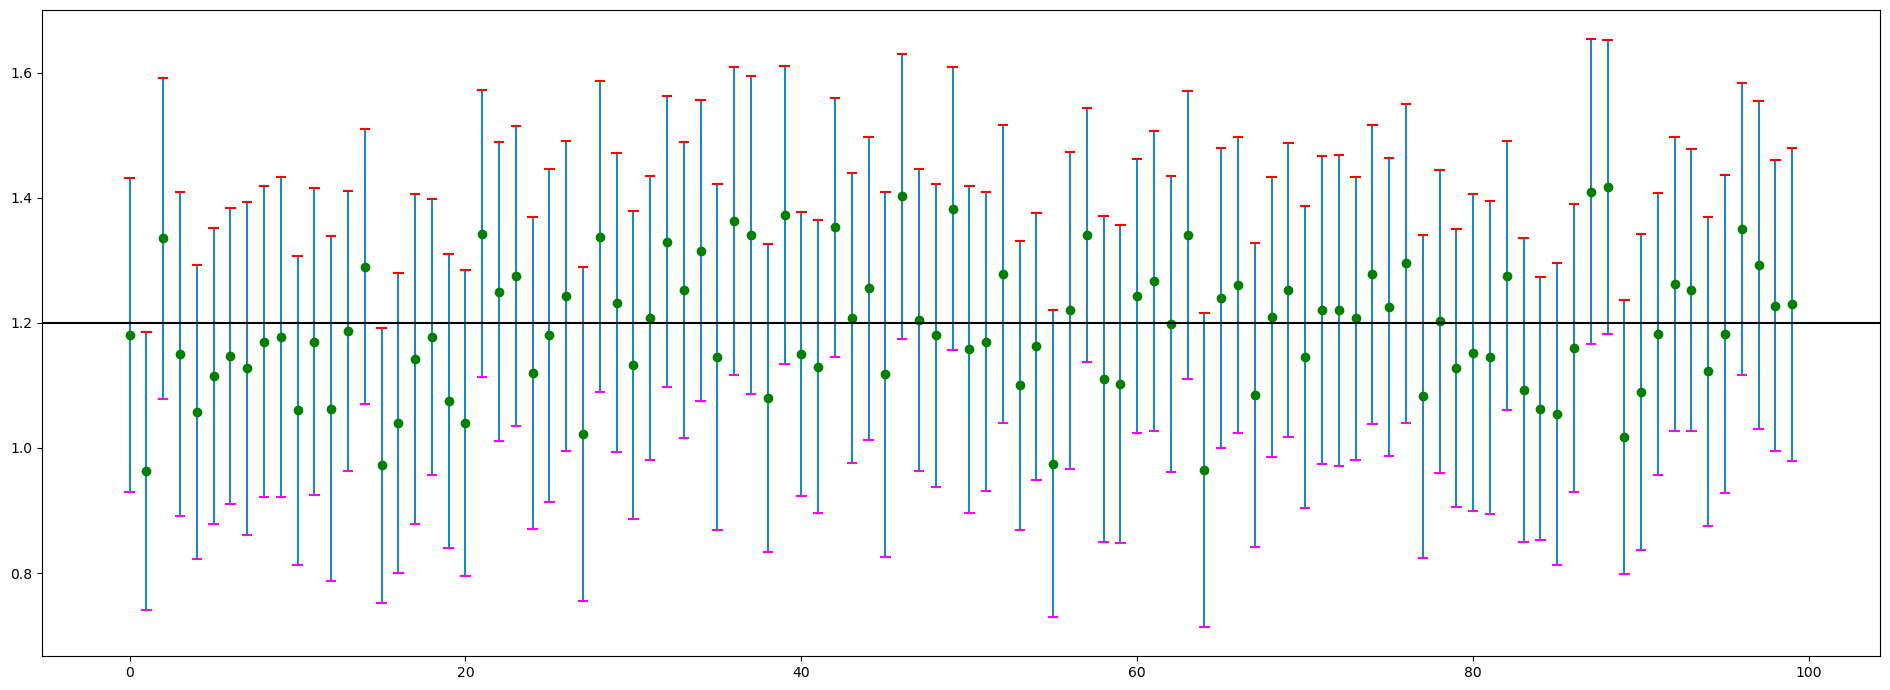

The population parameter lies within range  99  times out of  100  or 99.0%


In [53]:
# using t statistic
iris = data('iris')
petal_width = iris['Petal.Width']
df = pd.Series(petal_width)
num_samples2 = 100
alist3 = []; std2 = [];
for i in range(num_samples2):
    temp = df.sample(40)
    alist3.append(temp.tolist())
    std2.append(temp.std())
      # taking mean of 40 samples from population

plt.figure(figsize=(19,7))
for i, (j,k) in enumerate(zip(alist3, std2)): 
    confidence_plot(i, j, std = k, z = st.t.ppf(0.975, 39)) # using standard deviation of sample
plt.axhline(y = df.mean(), color='black'); 
plt.tight_layout(); plt.show();

lower_limits2 = []
upper_limits2 = []
means_list2 = []
for i, j in enumerate(alist3):
    values = np.array(j); 
    means = np.mean(values)
    means_list2.append(means)
    std = 0.7622
    moe = 1.96 * std / np.sqrt(values.size)
    lower_limits2.append(means-moe)
    upper_limits2.append(means+moe)

limit_check2 = []
for i in range(len(means_list2)):
    if (df.mean() >= lower_limits2[i])  & (df.mean() <= upper_limits2[i]):
        limit_check2.append(1)

print("The population parameter lies within range ", pd.Series(np.array(limit_check2)).shape[0], " times out of ", num_samples2,
       f" or {pd.Series(np.array(limit_check2)).shape[0]/num_samples2*100}%")

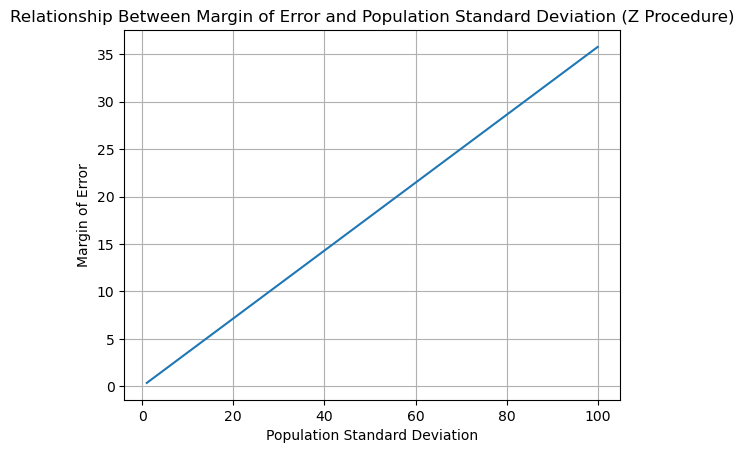

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of population standard deviations
population_std_devs = np.arange(1, 101)

# Calculate the margin of error for each population standard deviation
margin_of_errors = critical_value * (population_std_devs / np.sqrt(sample_size))

# Plot the relationship
plt.plot(population_std_devs, margin_of_errors)
plt.xlabel("Population Standard Deviation")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Population Standard Deviation (Z Procedure)")
plt.grid(True)
plt.show()

from the formula of confidence interval, we know that 
> $$ \text{Confidence Interval} \propto \sigma $$
so, more the variation in the data, more the chances of error in calculating the interval, less the variation in the data, less the chances of error in calculating the interval.


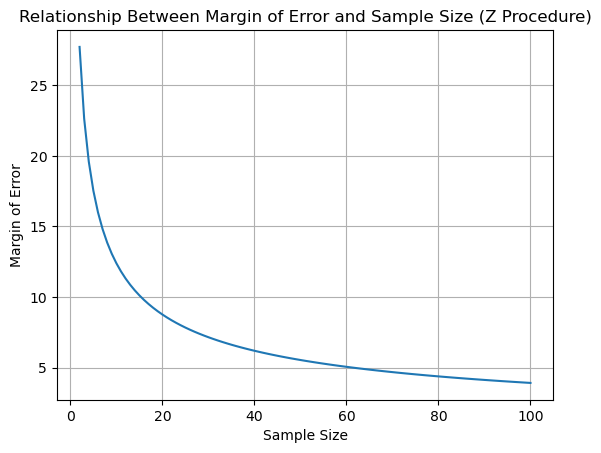

In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_std_dev = 20
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of sample sizes
sample_sizes = np.arange(2, 101)

# Calculate the margin of error for each sample size
margin_of_errors = critical_value * (population_std_dev / np.sqrt(sample_sizes))

# Plot the relationship
plt.plot(sample_sizes, margin_of_errors)
plt.xlabel("Sample Size")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Sample Size (Z Procedure)")
plt.grid(True)
plt.show()

from the formula of confidence interval, we know that 
> $$ \text{Confidence Interval} \propto \frac{1}{\sqrt{n}} $$
so, we can see that as sample size increases from 0 to 30, a huge drop in margin of error takes place. After 30 to 100, margin of error is reduced but only in small amount. <br>
That's why, in Central Limit Thoerem, there is a condition that sample size must be  greater than or equal to 30 (n >= 30), so that errors get reduced substaintially,

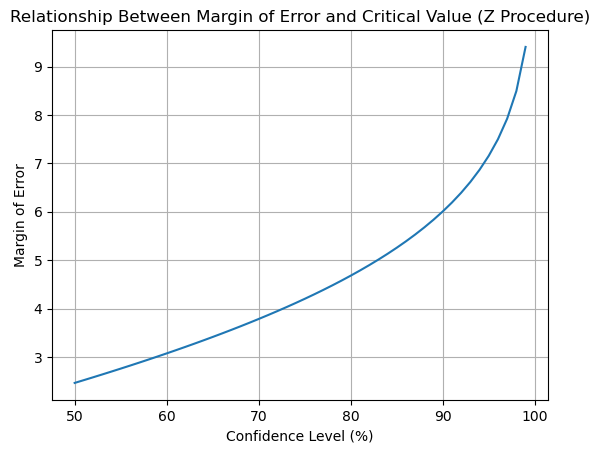

In [39]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
population_std_dev = 20

# Generate an array of confidence levels from 50% to 99%
confidence_levels = np.arange(50, 100)

# Calculate the critical values (Z-scores) for each confidence level
critical_values = stats.norm.ppf((1 + confidence_levels / 100) / 2)

# Calculate the margin of error for each critical value
margin_of_errors = critical_values * (population_std_dev / np.sqrt(sample_size))

# Plot the relationship
plt.plot(confidence_levels, margin_of_errors)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Critical Value (Z Procedure)")
plt.grid(True)
plt.show()


We can see here that 95% Confidence level has low margin of error unlike of 100% confidence level, while maintaining a good confidence level. That is why, in general, 95% confidence level is considered good in many industrial application. 

Although, selection of confidence level is based on many other factors too.